In [62]:
import pandas as pd
import networkx as nx
import json
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import pprint

In [63]:
df = pd.read_csv("data_scopus.csv")

In [64]:
df[['Author(s) ID','Authors with affiliations']].iloc[0]['Authors with affiliations']

'Zhang, Y., Department of Civil and Environmental Engineering, University of Alberta, Edmonton, AB  T6G 1H9, Canada; Liu, H., Department of Civil and Construction Engineering, Western Michigan University, Kalamazoo, MI  49008-5316, United States; Kang, S.-C., Department of Civil and Environmental Engineering, University of Alberta, Edmonton, AB  T6G 1H9, Canada; Al-Hussein, M., Department of Civil and Environmental Engineering, University of Alberta, Edmonton, AB  T6G 1H9, Canada'

In [65]:
authors = df['Author(s) ID'].apply(lambda x: [id for id in x.split(";") if id.strip() != '' and id.strip() != '[No author id available]']).to_list()
authors = [author_list for author_list in authors if author_list]

In [66]:
authors

[['57202536919', '53984550800', '57215426514', '6603541102'],
 ['23398572100', '57191836654'],
 ['57205293410',
  '56421700900',
  '24831175200',
  '36195159400',
  '6507346536',
  '6602981892'],
 ['57201502480', '57171240600', '35373203100', '25925695500', '57200282319'],
 ['6505934038', '57202719622', '35590173900'],
 ['14628356000', '7006162997'],
 ['57204951915',
  '36656019700',
  '8399981200',
  '57196119394',
  '57204952424',
  '57213421778'],
 ['57210571032',
  '36995837100',
  '6603639150',
  '57208132039',
  '57193809880',
  '57208123780',
  '7402264252',
  '7401951879',
  '57202410843'],
 ['57189029589'],
 ['57202995868', '56142103500', '57204058927'],
 ['57201030837',
  '57208132039',
  '14031725600',
  '57208123780',
  '35291520900',
  '57193082748',
  '57210803755'],
 ['56434720200', '57207859284', '25929119800', '55809641900'],
 ['57140618200',
  '55537800900',
  '57208164221',
  '57208160887',
  '57193387530',
  '56520099600',
  '39661236700',
  '6602415651',
  '3966113

In [67]:
len(authors)

561

In [68]:
import numpy as np

In [69]:
authors_flat_list = []
for items in authors:
  for author in items:
    if len(author)>0:
      authors_flat_list.append(author)

In [70]:
authors_flat_list

['57202536919',
 '53984550800',
 '57215426514',
 '6603541102',
 '23398572100',
 '57191836654',
 '57205293410',
 '56421700900',
 '24831175200',
 '36195159400',
 '6507346536',
 '6602981892',
 '57201502480',
 '57171240600',
 '35373203100',
 '25925695500',
 '57200282319',
 '6505934038',
 '57202719622',
 '35590173900',
 '14628356000',
 '7006162997',
 '57204951915',
 '36656019700',
 '8399981200',
 '57196119394',
 '57204952424',
 '57213421778',
 '57210571032',
 '36995837100',
 '6603639150',
 '57208132039',
 '57193809880',
 '57208123780',
 '7402264252',
 '7401951879',
 '57202410843',
 '57189029589',
 '57202995868',
 '56142103500',
 '57204058927',
 '57201030837',
 '57208132039',
 '14031725600',
 '57208123780',
 '35291520900',
 '57193082748',
 '57210803755',
 '56434720200',
 '57207859284',
 '25929119800',
 '55809641900',
 '57140618200',
 '55537800900',
 '57208164221',
 '57208160887',
 '57193387530',
 '56520099600',
 '39661236700',
 '6602415651',
 '39661131900',
 '55205882400',
 '7801408662',
 '3

In [71]:
len(authors_flat_list)

1879

In [72]:
global errNum
errNum = 0

def getCountry(author_id):
    try:
        df_temp = authors_flat_dict[author_id]
        index = df_temp.iloc[0]['Author(s) ID'].split(";").index(author_id)
        print(author_id, df_temp.iloc[0]['Authors with affiliations'].split(";")[index].split(",")[-1])
        return 0
    except Exception as e:
        print(e)
        return 1

num = 0
excluded_authors = {
    '7006823587': "A.P.",
    '7004325039': "G.J.",
    '57196830795': "M.",
    '8213137900': "S.",
    '8969426800': "S.",
    '9134075300': "T.D.",
    '57197601225': "J.W.",
    '57196905130': "C.E.",
    '8897578200': "G.R.",
    '7403669974': "Google",
    '6701855101': "Yahoo",
    '7006832588': "K.",
    '57213671185': "M.",
    '7003588954': "M.",
    '57213664077': "W.",
    '55914125200': "I.",
    '7102607078': "J.",
    '7006313615': "B.",
    '6602173002': "M.",
    '14631652200': "Visible Decisions Inc",
}

# Replace university names with "United States" for specific author IDs
replace_values = {
    '7201593410': 'United States',
    '7201387294': 'United States',
    '7201900328': 'United States',
    '35242298500': 'United States',
    '7003538943': 'United States',
    '57213238810': 'United States',
    '7004562694': 'United States',
}


In [73]:
authors_flat_dict = {}
for author in authors_flat_list:
    # Extracting the country from the last affiliation
    country = df[df['Author(s) ID'].str.contains(author)] \
        [['Author(s) ID', 'Authors', 'Year', 'Cited by', 'Authors with affiliations']] \
        .iloc[0]['Authors with affiliations'].split(";")[-1].split(",")[-1].strip()

    # Counting the number of publications for the author
    num_publications = df[df['Author(s) ID'].str.contains(author)].shape[0]

    # Summing the 'Cited by' values for each author
    total_citations = df[df['Author(s) ID'].str.contains(author)]['Cited by'].sum()

    # Adding the country, number of publications, and total citations to the dictionary, replacing NaN in 'Cited by' with 0
    authors_flat_dict[author] = {
        'data': df[df['Author(s) ID'].str.contains(author)] \
                    [['Author(s) ID', 'Authors', 'Year', 'Cited by']] \
                    .fillna({'Cited by': 0}),
        'Country': replace_values.get(author, country),  # Use the replaced value if available
        'NumPublications': num_publications,
        'TotalCitations': total_citations
    }

# accessing the data in the dictionary
for author_id, data in authors_flat_dict.items():
    print(f"Author ID: {author_id}, Country: {data['Country']}, Num Publications: {data['NumPublications']}, Total Citations: {data['TotalCitations']}")
    print(data['data'])


Author ID: 57202536919, Country: Canada, Num Publications: 1, Total Citations: 0.0
                                      Author(s) ID  \
0  57202536919;53984550800;57215426514;6603541102;   

                                       Authors  Year  Cited by  
0  Zhang Y., Liu H., Kang S.-C., Al-Hussein M.  2020       0.0  
Author ID: 53984550800, Country: Canada, Num Publications: 2, Total Citations: 19.0
                                       Author(s) ID  \
0   57202536919;53984550800;57215426514;6603541102;   
14  57204697057;53984550800;55642611800;6603541102;   

                                        Authors  Year  Cited by  
0   Zhang Y., Liu H., Kang S.-C., Al-Hussein M.  2020       0.0  
14       Yin X., Liu H., Chen Y., Al-Hussein M.  2019      19.0  
Author ID: 57215426514, Country: Canada, Num Publications: 1, Total Citations: 0.0
                                      Author(s) ID  \
0  57202536919;53984550800;57215426514;6603541102;   

                                      

                                         Author(s) ID  \
25  57211297330;41561201100;56487883000;5721129837...   

                                              Authors  Year  Cited by  
25  Tabidze K., Fedorova I., Sidorina I., Volynets...  2019       0.0  
Author ID: 57211292289, Country: Slovakia, Num Publications: 1, Total Citations: 0.0
                            Author(s) ID                            Authors  \
26  57211292289;57205463012;57211289040;  Choma L., Jevčák J., Rozemberg R.   

    Year  Cited by  
26  2019       0.0  
Author ID: 57205463012, Country: Slovakia, Num Publications: 1, Total Citations: 0.0
                            Author(s) ID                            Authors  \
26  57211292289;57205463012;57211289040;  Choma L., Jevčák J., Rozemberg R.   

    Year  Cited by  
26  2019       0.0  
Author ID: 57211289040, Country: Slovakia, Num Publications: 1, Total Citations: 0.0
                            Author(s) ID                            Authors  \
26  5

                                         Author(s) ID  \
47  16240506100;57200206504;57200200578;5641442370...   

                                              Authors  Year  Cited by  
47  Wischgoll T., Glines M., Whitlock T., Guthrie ...  2018       0.0  
Author ID: 7102439067, Country: United States, Num Publications: 1, Total Citations: 0.0
                                         Author(s) ID  \
47  16240506100;57200206504;57200200578;5641442370...   

                                              Authors  Year  Cited by  
47  Wischgoll T., Glines M., Whitlock T., Guthrie ...  2018       0.0  
Author ID: 7005529628, Country: United States, Num Publications: 1, Total Citations: 0.0
                                         Author(s) ID  \
47  16240506100;57200206504;57200200578;5641442370...   

                                              Authors  Year  Cited by  
47  Wischgoll T., Glines M., Whitlock T., Guthrie ...  2018       0.0  
Author ID: 57203806666, Country: United State

                                         Author(s) ID  \
79  57205719068;35387409600;25122291300;5719553851...   

                                              Authors  Year  Cited by  
79  Rodríguez B., Arce-Lopera C., Arboleda A.M., D...  2018       0.0  
Author ID: 57207884555, Country: Colombia, Num Publications: 1, Total Citations: 0.0
                                         Author(s) ID  \
79  57205719068;35387409600;25122291300;5719553851...   

                                              Authors  Year  Cited by  
79  Rodríguez B., Arce-Lopera C., Arboleda A.M., D...  2018       0.0  
Author ID: 57195517413, Country: South Korea, Num Publications: 1, Total Citations: 0.0
                                         Author(s) ID  \
80  57195517413;57207874788;57207877137;5720258596...   

                                    Authors  Year  Cited by  
80  Noh S., Lee Y., Kim Y., Cho J., Choi A.  2018       0.0  
Author ID: 57207874788, Country: South Korea, Num Publications: 1, Tot

                                          Author(s) ID  \
104  56048415000;24802477200;55192325900;5719503125...   

                                               Authors  Year  Cited by  
104  Sacha D., Sedlmair M., Zhang L., Lee J.A., Pel...  2017      35.0  
Author ID: 34769953100, Country: Germany, Num Publications: 7, Total Citations: 245.0
                                          Author(s) ID  \
104  56048415000;24802477200;55192325900;5719503125...   
225  56686236600;55192325900;34880664000;8626331600...   
268               57070735900;14028721600;34769953100;   
350   16403514000;36176499400;36175844800;34769953100;   
427  34769953100;56206197300;6701488977;6507371561;...   
481  34769953100;7101940676;6505828864;7202370982;5...   
564                 34769953100;7005718994;6603248643;   

                                               Authors  Year  Cited by  
104  Sacha D., Sedlmair M., Zhang L., Lee J.A., Pel...  2017      35.0  
225  Pérez D., Zhang L., Schaefer M., Sc

                                          Author(s) ID  \
124     24329464200;35484079200;8419641700;7402976558;   
230  37011104900;35484079200;24777795500;6603075075...   

                                               Authors  Year  Cited by  
124  Basole R.C., Huhtamäki J., Still K., Russell M.G.  2016      35.0  
230  Jussila J., Huhtamäki J., Henttonen K., Kärkkä...  2014      10.0  
Author ID: 7402976558, Country: United States, Num Publications: 1, Total Citations: 35.0
                                       Author(s) ID  \
124  24329464200;35484079200;8419641700;7402976558;   

                                               Authors  Year  Cited by  
124  Basole R.C., Huhtamäki J., Still K., Russell M.G.  2016      35.0  
Author ID: 7202059582, Country: Austria, Num Publications: 2, Total Citations: 13.0
                            Author(s) ID                             Authors  \
125  7202059582;26032727500;24802062000;  Pohl M., Wallner G., Kriglstein S.   
505            

                                        Author(s) ID  \
149  6507371561;24802658700;56040181100;55908305800;   

                                     Authors  Year  Cited by  
149  Sips M., Unger A., Rawald T., Sasgen I.  2016       2.0  
Author ID: 56040181100, Country: Germany, Num Publications: 1, Total Citations: 2.0
                                        Author(s) ID  \
149  6507371561;24802658700;56040181100;55908305800;   

                                     Authors  Year  Cited by  
149  Sips M., Unger A., Rawald T., Sasgen I.  2016       2.0  
Author ID: 55908305800, Country: Germany, Num Publications: 1, Total Citations: 2.0
                                        Author(s) ID  \
149  6507371561;24802658700;56040181100;55908305800;   

                                     Authors  Year  Cited by  
149  Sips M., Unger A., Rawald T., Sasgen I.  2016       2.0  
Author ID: 22985191200, Country: United States, Num Publications: 3, Total Citations: 158.0
                       

                                          Author(s) ID  \
175  57189324792;23466440800;55920693700;5533110930...   

                                               Authors  Year  Cited by  
175  Künkel D., Bomsdorf B., Röhrig R., Ahlbrandt J...  2015       2.0  
Author ID: 23466440800, Country: Germany, Num Publications: 1, Total Citations: 2.0
                                          Author(s) ID  \
175  57189324792;23466440800;55920693700;5533110930...   

                                               Authors  Year  Cited by  
175  Künkel D., Bomsdorf B., Röhrig R., Ahlbrandt J...  2015       2.0  
Author ID: 55920693700, Country: Germany, Num Publications: 1, Total Citations: 2.0
                                          Author(s) ID  \
175  57189324792;23466440800;55920693700;5533110930...   

                                               Authors  Year  Cited by  
175  Künkel D., Bomsdorf B., Röhrig R., Ahlbrandt J...  2015       2.0  
Author ID: 55331109300, Country: Germany, N

                                         Author(s) ID  \
203  12806905400;35868245800;56431256000;57202891953;   

                              Authors  Year  Cited by  
203  Song R., Wang X., Wang Y., Gu M.  2015       0.0  
Author ID: 35868245800, Country: China, Num Publications: 1, Total Citations: 0.0
                                         Author(s) ID  \
203  12806905400;35868245800;56431256000;57202891953;   

                              Authors  Year  Cited by  
203  Song R., Wang X., Wang Y., Gu M.  2015       0.0  
Author ID: 56431256000, Country: China, Num Publications: 1, Total Citations: 0.0
                                         Author(s) ID  \
203  12806905400;35868245800;56431256000;57202891953;   

                              Authors  Year  Cited by  
203  Song R., Wang X., Wang Y., Gu M.  2015       0.0  
Author ID: 57202891953, Country: China, Num Publications: 1, Total Citations: 0.0
                                         Author(s) ID  \
203  12806905400

                                          Author(s) ID  \
245  24824284200;24829314000;7005835913;26424619100...   

                                               Authors  Year  Cited by  
245  Jayaraman P.P., Gunasekera K., Burstein F., De...  2013       8.0  
Author ID: 7005835913, Country: Australia, Num Publications: 1, Total Citations: 8.0
                                          Author(s) ID  \
245  24824284200;24829314000;7005835913;26424619100...   

                                               Authors  Year  Cited by  
245  Jayaraman P.P., Gunasekera K., Burstein F., De...  2013       8.0  
Author ID: 26424619100, Country: Australia, Num Publications: 1, Total Citations: 8.0
                                          Author(s) ID  \
245  24824284200;24829314000;7005835913;26424619100...   

                                               Authors  Year  Cited by  
245  Jayaraman P.P., Gunasekera K., Burstein F., De...  2013       8.0  
Author ID: 55633574900, Country: Austral

                             Author(s) ID  \
280  24071096600;55336333900;54881489000;   

                                        Authors  Year  Cited by  
280  Kozlíková B., Aleksandrowicz I., Sochor J.  2011       0.0  
Author ID: 55336333900, Country: Czech Republic, Num Publications: 1, Total Citations: 0.0
                             Author(s) ID  \
280  24071096600;55336333900;54881489000;   

                                        Authors  Year  Cited by  
280  Kozlíková B., Aleksandrowicz I., Sochor J.  2011       0.0  
Author ID: 54881489000, Country: Czech Republic, Num Publications: 1, Total Citations: 0.0
                             Author(s) ID  \
280  24071096600;55336333900;54881489000;   

                                        Authors  Year  Cited by  
280  Kozlíková B., Aleksandrowicz I., Sochor J.  2011       0.0  
Author ID: 55574399400, Country: United States, Num Publications: 1, Total Citations: 1.0
                             Author(s) ID                  

                                       Author(s) ID  \
323  55336616200;7004051991;7102258119;15032668000;   

                                         Authors  Year  Cited by  
323  Capanna C., Jorda L., Lamy P., Gesquiere G.  2011       2.0  
Author ID: 7102258119, Country: France, Num Publications: 1, Total Citations: 2.0
                                       Author(s) ID  \
323  55336616200;7004051991;7102258119;15032668000;   

                                         Authors  Year  Cited by  
323  Capanna C., Jorda L., Lamy P., Gesquiere G.  2011       2.0  
Author ID: 11439968500, Country: Japan, Num Publications: 1, Total Citations: 1.0
                                       Author(s) ID  \
325  11439968500;55584794434;7201892718;7405311526;   

                                              Authors  Year  Cited by  
325  Furukawa M., Watanabe M., Suzuki I., Yamamoto M.  2011       1.0  
Author ID: 55584794434, Country: Japan, Num Publications: 1, Total Citations: 1.0
         

                            Author(s) ID  \
367              6506820011;26643345500;   
439  26643345500;6506820011;24559166600;   

                                    Authors  Year  Cited by  
367               Butavicius M.A., Lee M.D.  2007       9.0  
439  Lee M.D., Butavicius M.A., Reilly R.E.  2003      21.0  
Author ID: 26643345500, Country: United States, Num Publications: 2, Total Citations: 30.0
                            Author(s) ID  \
367              6506820011;26643345500;   
439  26643345500;6506820011;24559166600;   

                                    Authors  Year  Cited by  
367               Butavicius M.A., Lee M.D.  2007       9.0  
439  Lee M.D., Butavicius M.A., Reilly R.E.  2003      21.0  
Author ID: 14054208900, Country: Taiwan, Num Publications: 1, Total Citations: 18.0
                             Author(s) ID                             Authors  \
368  14054208900;12778673800;15726851700;  Huang Y.-P., Hsu C.-C., Wang S.-H.   

     Year  Cited by  
36

                                       Author(s) ID  \
405  57206289517;13405022200;7005757938;7103351555;   

                                            Authors  Year  Cited by  
405  Novak J., Wurst M., Fleischmann M., Strauss W.  2004       6.0  
Author ID: 13405022200, Country: Germany, Num Publications: 1, Total Citations: 6.0
                                       Author(s) ID  \
405  57206289517;13405022200;7005757938;7103351555;   

                                            Authors  Year  Cited by  
405  Novak J., Wurst M., Fleischmann M., Strauss W.  2004       6.0  
Author ID: 7005757938, Country: Germany, Num Publications: 1, Total Citations: 6.0
                                       Author(s) ID  \
405  57206289517;13405022200;7005757938;7103351555;   

                                            Authors  Year  Cited by  
405  Novak J., Wurst M., Fleischmann M., Strauss W.  2004       6.0  
Author ID: 7103351555, Country: Germany, Num Publications: 1, Total Citations: 6

               Author(s) ID                   Authors  Year  Cited by
452  9636797600;7005893610;  Dennis B.M., Healey C.G.  2002      12.0
Author ID: 7005893610, Country: United States, Num Publications: 1, Total Citations: 12.0
               Author(s) ID                   Authors  Year  Cited by
452  9636797600;7005893610;  Dennis B.M., Healey C.G.  2002      12.0
Author ID: 6603892607, Country: United States, Num Publications: 1, Total Citations: 23.0
                            Author(s) ID                         Authors  \
453  6603892607;56635594600;35242602500;  Lum E.B., Stompel A., Ma K.-L.   

     Year  Cited by  
453  2002      23.0  
Author ID: 56635594600, Country: United States, Num Publications: 1, Total Citations: 23.0
                            Author(s) ID                         Authors  \
453  6603892607;56635594600;35242602500;  Lum E.B., Stompel A., Ma K.-L.   

     Year  Cited by  
453  2002      23.0  
Author ID: 56170177000, Country: United States, Num Pub

                                     Author(s) ID  \
502  6506736361;7005748472;6603594088;7403472856;   

                                               Authors  Year  Cited by  
502  Risden K., Czerwinski M.P., Munzner T., Cook D.B.  2000      67.0  
Author ID: 7102783809, Country: United States, Num Publications: 2, Total Citations: 13.0
    Author(s) ID        Authors  Year  Cited by
503  7102783809;  Humphrey M.C.  2000       7.0
524  7102783809;  Humphrey M.C.  1999       6.0
Author ID: 6507307461, Country: Austria, Num Publications: 1, Total Citations: 8.0
               Author(s) ID                  Authors  Year  Cited by
505  7202059582;6507307461;  Pohl M., Purgathofer P.  2000       8.0
Author ID: 6603561554, Country: United States, Num Publications: 1, Total Citations: 54.0
                           Author(s) ID  \
506  6603561554;7004102300;57201497598;   

                                       Authors  Year  Cited by  
506  Harrower M., Mac Eachren A., Griffin A.L.  20

In [74]:
# Creating a graph and adding nodes with attributes
G = nx.Graph()
for author_id, attributes in authors_flat_dict.items():
    if 'data' in attributes and 'Country' in attributes and 'NumPublications' in attributes:
        node_attributes = {
            'AuthorID': author_id,
            'Authors': attributes['data']['Authors'].iloc[0],
            'Year': int(attributes['data']['Year'].iloc[0]),  # Convert to standard Python integer
            'CitedBy': attributes['data']['Cited by'].iloc[0],
            'Country': attributes['Country'],
            'NumPublications': attributes['NumPublications'],
            'TotalCitations': attributes['TotalCitations'],
        }

        G.add_node(author_id, **node_attributes)

In [75]:
# Adding edges to the graph
for row in df.iterrows():
    if ";" in row[1]['Author(s) ID']:
        authors = row[1]['Author(s) ID'][:-1].split(";")
        if len(authors) > 1:
            edges = ([(authors[i], authors[j]) for i in range(len(authors)) for j in range(i + 1, len(authors))])
            G.add_edges_from(edges)

# Customizing the node-link data structure
node_link_data = {
    "nodes": [{"AuthorID": node, **data} for node, data in G.nodes(data=True)],
    "links": [{"source": source, "target": target} for source, target in G.edges()]
}

In [76]:
import networkx as nx
from networkx.readwrite import json_graph
import json

# Saving the graph as a JSON file
#with open("sample_network.json", 'w') as f:
 #   json.dump(json_graph.node_link_data(G), f)
    # Saving the modified graph as a JSON file
with open("sample_network.json", 'w') as f:
    json.dump(node_link_data, f)


In [77]:
G.add_edges_from(edges)

In [78]:
#pos = nx.drawing.circular_layout(G)
pos = nx.spring_layout(G)

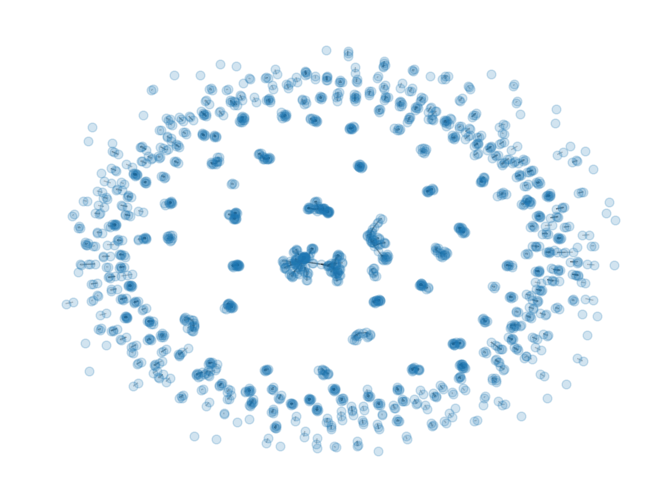

In [79]:
nx.draw(G,pos=pos, node_size=40,alpha=.2)

In [80]:
# Convert node identifiers to strings with a custom sorting key
node_labels = sorted(G.nodes(), key=lambda x: str(x))
mapping = dict(zip(node_labels, range(1, len(node_labels) + 1)))
G = nx.relabel.relabel_nodes(G, mapping)

# Write the graph to a GML file
nx.write_gml(G, "net.gml")